In [120]:
import numpy as np
import pandas as pd

In [121]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, kurtosis, probplot, skew
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
#pd.set_option('max_columns',200)

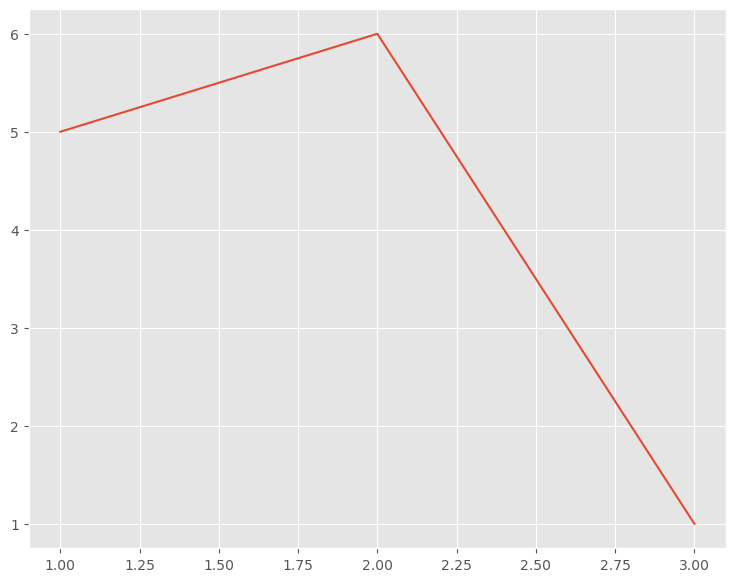

In [122]:
# line plot= subplots, plot some data on axies
fig, ax= plt.subplots(figsize=(9,7))
ax.plot([1,2,3],[5,6,1])
plt.show()

In [123]:
# seaborn=sns for statistical analysis

In [124]:
# bokeh nice for ineractive interface

In [125]:
df=pd.read_csv('/Users/razy/GitH projects/Learning-May 2024/California Housing prices/housing.csv')

In [126]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [128]:
df.dropna(inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [130]:
X=df.drop('median_house_value', axis=1)
y=df['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [131]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [132]:
train=X_train.join(y_train)
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16751,-122.46,37.71,45.0,1799.0,394.0,1436.0,389.0,3.6500,NEAR OCEAN,239900.0
12936,-121.25,38.66,26.0,3670.0,556.0,1616.0,550.0,5.0200,INLAND,169600.0
8389,-118.36,33.97,18.0,1284.0,283.0,990.0,289.0,4.0179,<1H OCEAN,195800.0
17819,-121.90,37.39,42.0,42.0,14.0,26.0,14.0,1.7361,<1H OCEAN,500001.0
15307,-117.37,33.19,18.0,975.0,382.0,650.0,286.0,1.9562,NEAR OCEAN,192500.0
...,...,...,...,...,...,...,...,...,...,...
7385,-118.24,33.97,37.0,1212.0,314.0,1403.0,279.0,2.5536,<1H OCEAN,117200.0
17534,-121.88,37.34,52.0,1390.0,365.0,921.0,352.0,2.1442,<1H OCEAN,188900.0
8801,-118.38,33.77,17.0,10950.0,2207.0,4713.0,2043.0,6.3064,NEAR OCEAN,418300.0
13824,-117.17,34.49,13.0,4460.0,925.0,2225.0,840.0,2.0136,INLAND,94100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

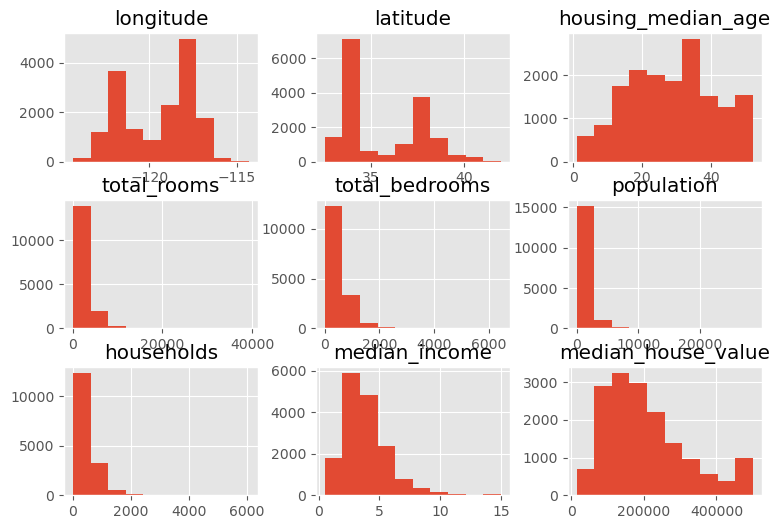

In [133]:
# see distribution of individual features
train.hist(figsize=(9,6))

In [134]:
# correlation of target variables
train.corr()

/var/folders/s6/tts4jbdd5qg8h_b0hhypf8ww0000gn/T/ipykernel_1336/1010319782.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925200,-0.105678,0.043670,0.067986,0.099319,0.055278,-0.016844,-0.045174
latitude,-0.925200,1.000000,0.009663,-0.034746,-0.065288,-0.106842,-0.069141,-0.077930,-0.144517
housing_median_age,-0.105678,0.009663,1.000000,-0.363230,-0.322734,-0.302390,-0.306247,-0.121253,0.103030
total_rooms,0.043670,-0.034746,-0.363230,1.000000,0.930018,0.864305,0.920089,0.201412,0.134942
total_bedrooms,0.067986,-0.065288,-0.322734,0.930018,1.000000,0.885312,0.980531,-0.004999,0.051749
population,0.099319,-0.106842,-0.302390,0.864305,0.885312,1.000000,0.913210,0.008639,-0.025256
households,0.055278,-0.069141,-0.306247,0.920089,0.980531,0.913210,1.000000,0.016055,0.065958
median_income,-0.016844,-0.077930,-0.121253,0.201412,-0.004999,0.008639,0.016055,1.000000,0.684423
median_house_value,-0.045174,-0.144517,0.103030,0.134942,0.051749,-0.025256,0.065958,0.684423,1.000000


/var/folders/s6/tts4jbdd5qg8h_b0hhypf8ww0000gn/T/ipykernel_1336/1187707570.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True,cmap='YlGnBu')


<Axes: >

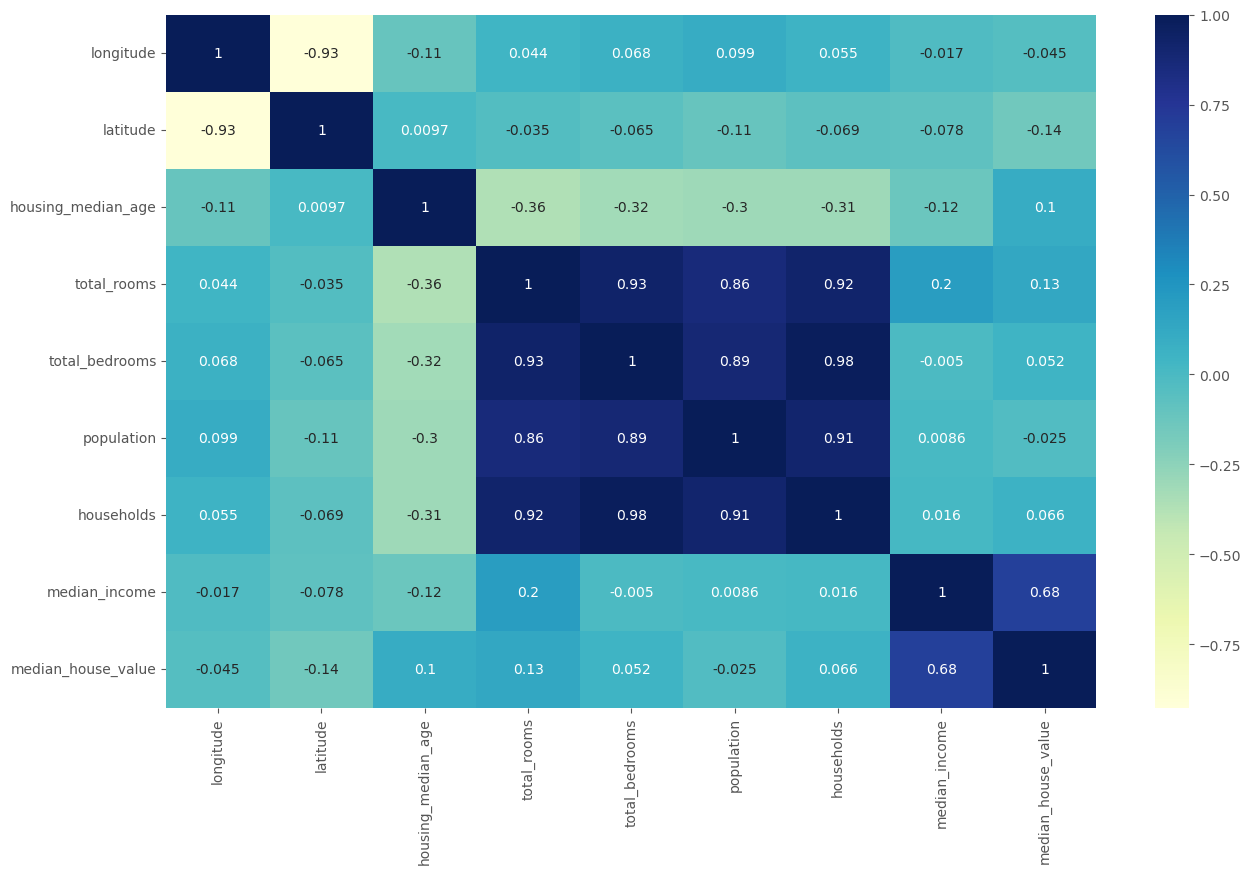

In [135]:
plt.figure(figsize=(15,9))
sns.heatmap(train.corr(), annot=True,cmap='YlGnBu')

In [136]:
# deep 
train['total_rooms']=np.log(train['total_rooms']+1)
train['total_bedrooms']=np.log(train['total_bedrooms']+1)
train['population']=np.log(train['population']+1)
train['households']=np.log(train['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

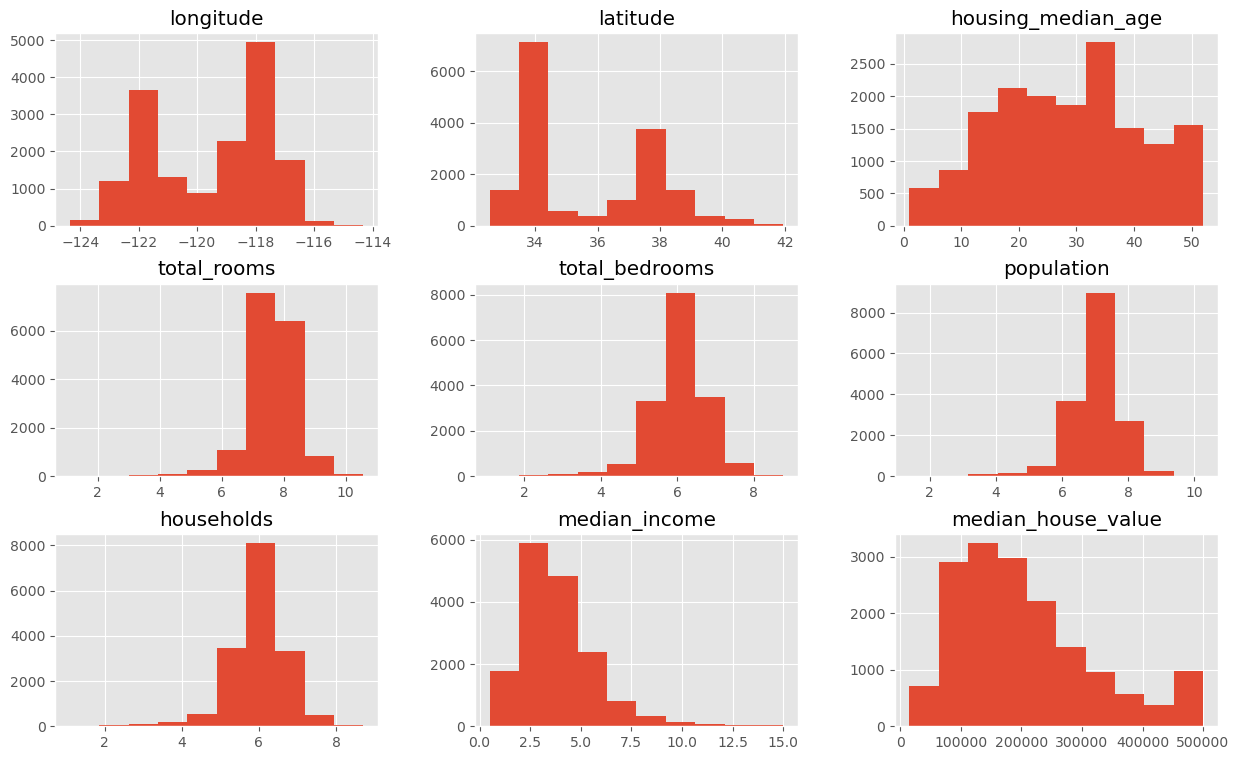

In [137]:
# we can see more normal distribution
train.hist(figsize=(15,9))

In [138]:
train.ocean_proximity.value_counts()

<1H OCEAN     7208
INLAND        5223
NEAR OCEAN    2093
NEAR BAY      1819
ISLAND           3
Name: ocean_proximity, dtype: int64

In [139]:
# asiging feature in every single value ablove
#change  ocea_proximity to multiple features by get_dummies
pd.get_dummies(train.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16751,0,0,0,0,1
12936,0,1,0,0,0
8389,1,0,0,0,0
17819,1,0,0,0,0
15307,0,0,0,0,1
...,...,...,...,...,...
7385,1,0,0,0,0
17534,1,0,0,0,0
8801,0,0,0,0,1
13824,0,1,0,0,0


In [140]:
train=train.join(pd.get_dummies(train.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16751,-122.46,37.71,45.0,7.495542,5.978886,7.270313,5.966147,3.6500,239900.0,0,0,0,0,1
12936,-121.25,38.66,26.0,8.208219,6.322565,7.388328,6.311735,5.0200,169600.0,0,1,0,0,0
8389,-118.36,33.97,18.0,7.158514,5.648974,6.898715,5.669881,4.0179,195800.0,1,0,0,0,0
17819,-121.90,37.39,42.0,3.761200,2.708050,3.295837,2.708050,1.7361,500001.0,1,0,0,0,0
15307,-117.37,33.19,18.0,6.883463,5.948035,6.478510,5.659482,1.9562,192500.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,-118.24,33.97,37.0,7.100852,5.752573,7.247081,5.634790,2.5536,117200.0,1,0,0,0,0
17534,-121.88,37.34,52.0,7.237778,5.902633,6.826545,5.866468,2.1442,188900.0,1,0,0,0,0
8801,-118.38,33.77,17.0,9.301186,7.699842,8.458292,7.622664,6.3064,418300.0,0,0,0,0,1
13824,-117.17,34.49,13.0,8.403128,6.830874,7.707962,6.734592,2.0136,94100.0,0,1,0,0,0


<Axes: >

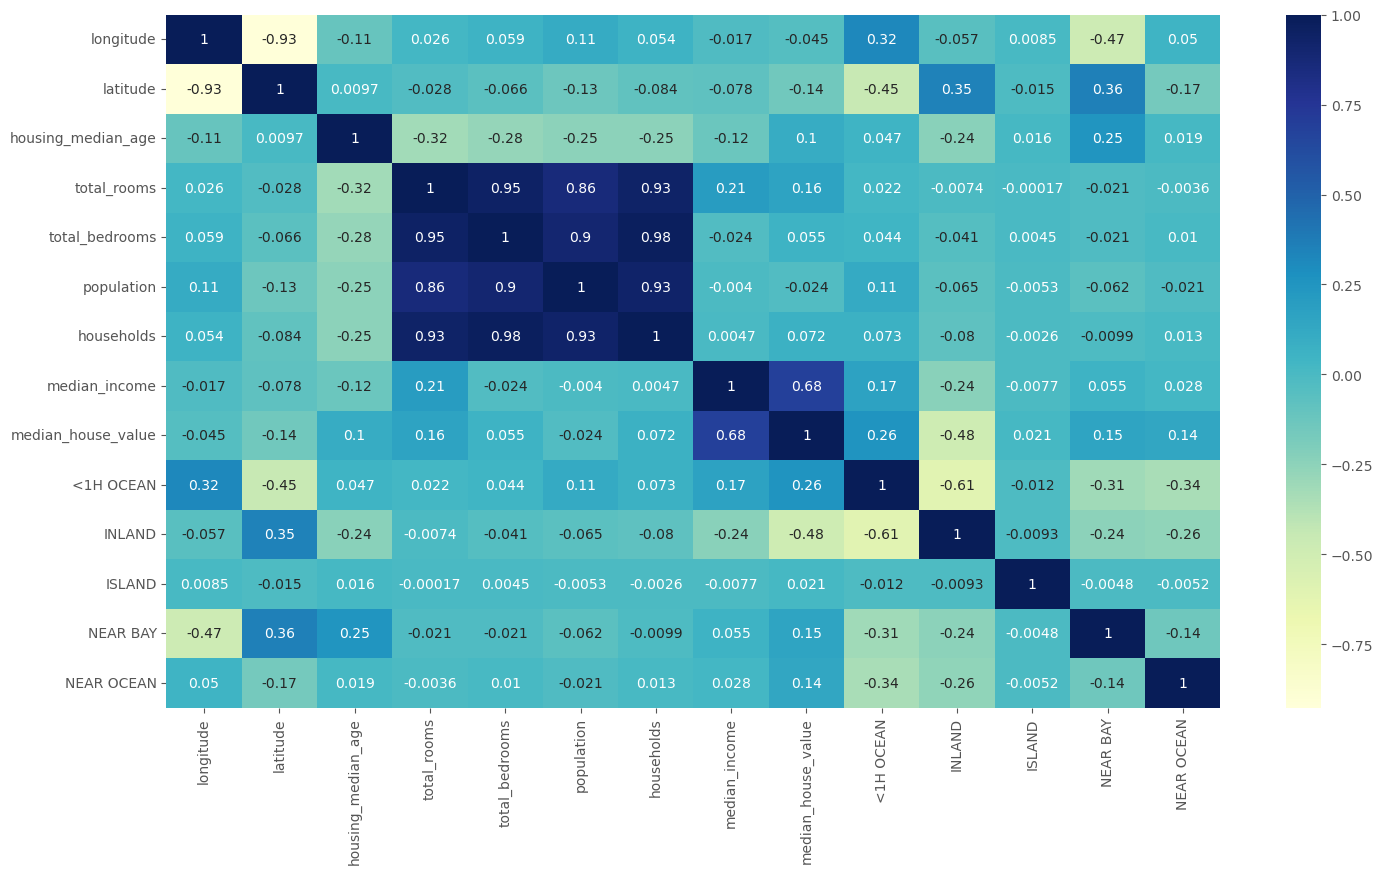

In [141]:
# see how values are correlate
train.corr()
plt.figure(figsize=(17,9))
sns.heatmap(train.corr(),annot=True,cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

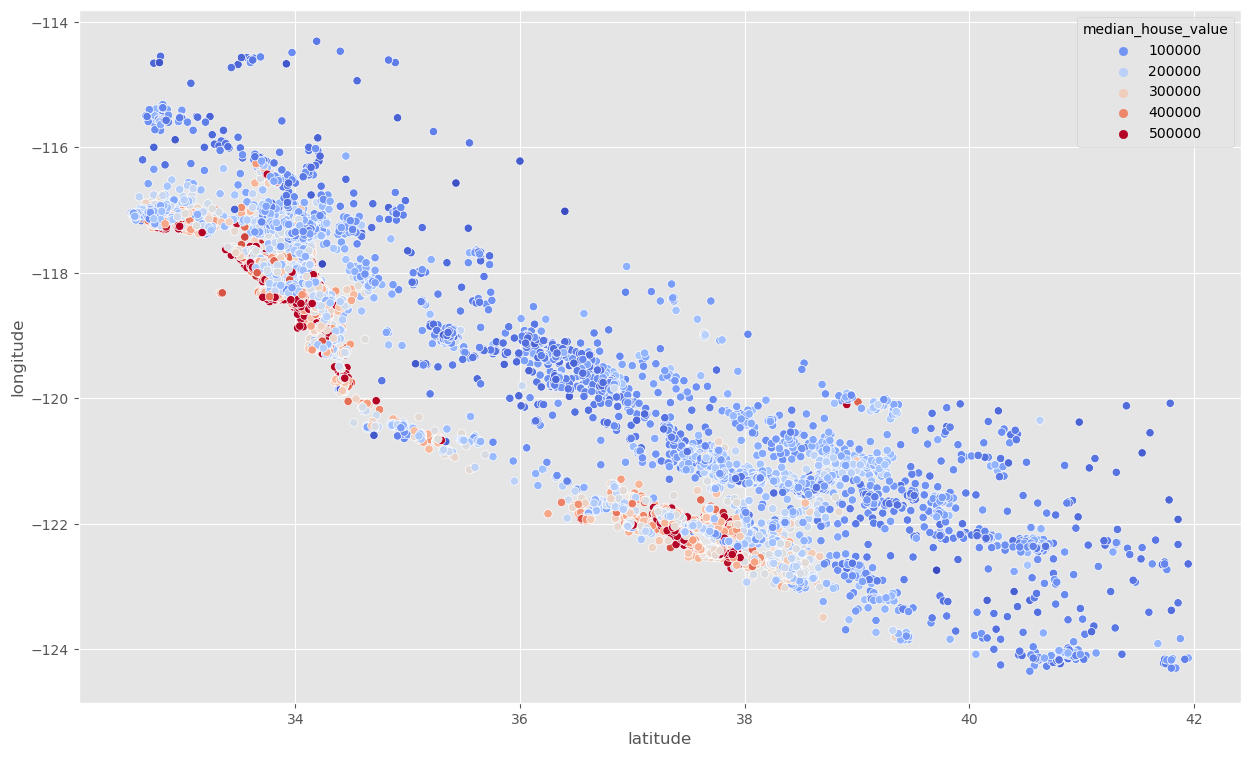

In [142]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='latitude', y='longitude', data=train, hue='median_house_value', palette='coolwarm')

In [143]:
# feature engineering
train['bedroom_ratio']=train['total_bedrooms']/train['total_rooms']
train['household_rooms']=train['total_rooms']/train['households']

<Axes: >

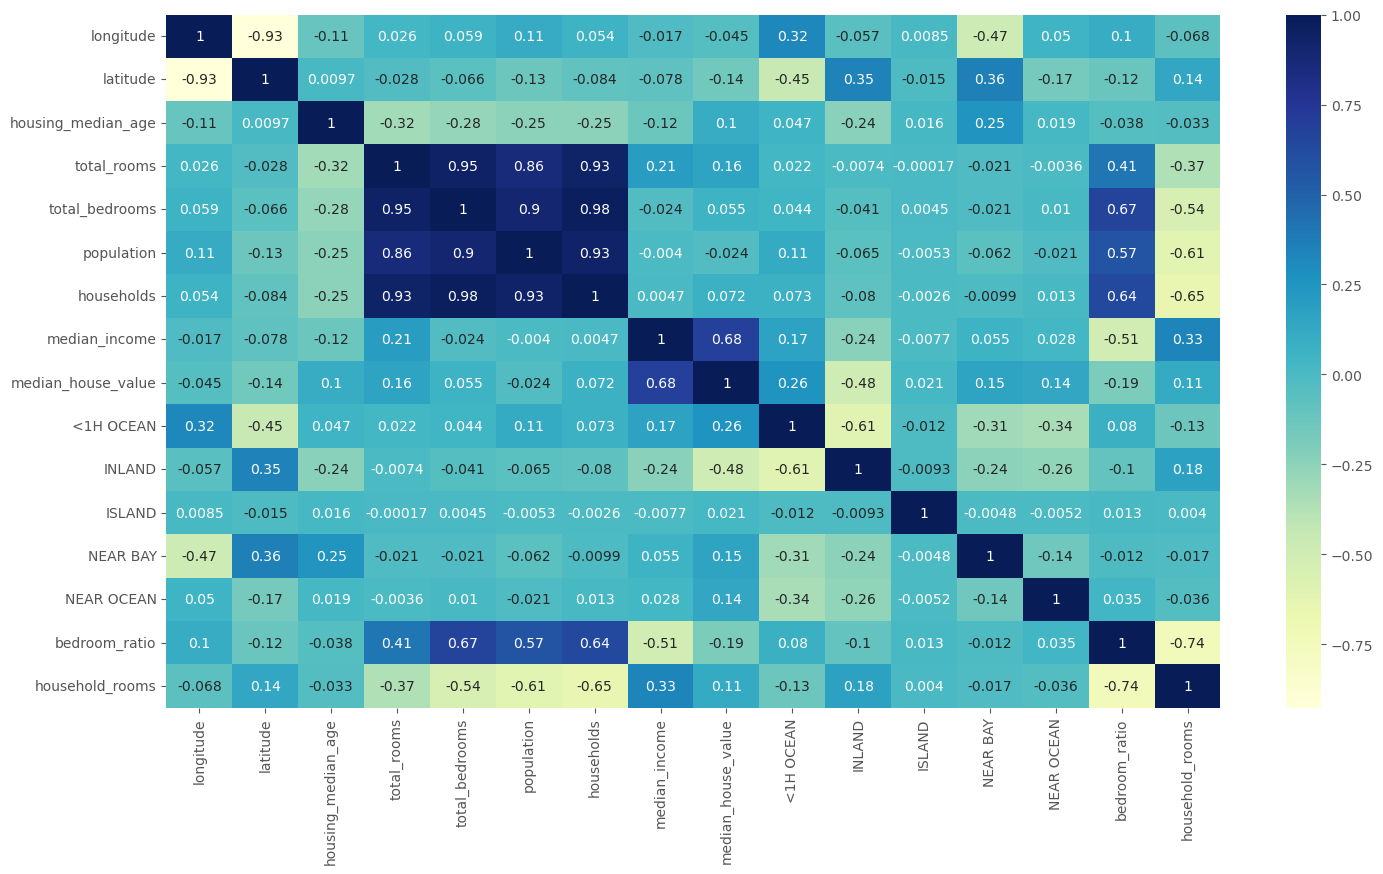

In [144]:
# see how values are correlate
train.corr()
plt.figure(figsize=(17,9))
sns.heatmap(train.corr(),annot=True,cmap='YlGnBu')

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
X_train, y_train=train.drop(['median_house_value'], axis=1), train['median_house_value']

#scaler
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)

reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [146]:
reg.fit(X_train_s, y_train)

LinearRegression()

In [147]:
# now Test data
test=X_test.join(y_test)
test['total_rooms']=np.log(test['total_rooms']+1)
test['total_bedrooms']=np.log(test['total_bedrooms']+1)
test['population']=np.log(test['population']+1)
test['households']=np.log(test['households']+1)

In [148]:
test=test.join(pd.get_dummies(test.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test['bedroom_ratio']=test['total_bedrooms']/test['total_rooms']
test['household_rooms']=test['total_rooms']/test['households']

In [149]:
train
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
2810,-119.02,35.42,40.0,7.556428,6.086775,6.923629,6.025866,1.4598,52600.0,0,1,0,0,0,0.805510,1.253999
20029,-119.03,36.08,19.0,7.914618,6.309918,7.267525,6.222576,2.6944,67700.0,0,1,0,0,0,0.797249,1.271920
3465,-118.46,34.31,24.0,7.979681,6.400257,7.286876,6.395262,4.2708,218200.0,1,0,0,0,0,0.802069,1.247749
6152,-117.96,34.10,30.0,7.928766,6.489205,7.954372,6.466145,3.2266,141800.0,0,1,0,0,0,0.818438,1.226197
2984,-119.01,35.34,36.0,6.881411,5.393628,6.419995,5.236442,1.5625,46700.0,0,1,0,0,0,0.783797,1.314139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10102,-117.97,33.93,35.0,7.543273,5.796058,6.897705,5.863631,4.1321,198100.0,1,0,0,0,0,0.768374,1.286451
1686,-122.26,37.98,28.0,7.620215,5.799093,6.854355,5.857933,5.1178,198000.0,0,0,0,1,0,0.761014,1.300837
11696,-117.99,33.89,21.0,8.555644,6.928538,7.839919,6.896694,4.5033,160500.0,1,0,0,0,0,0.809821,1.240543
6950,-118.07,33.99,35.0,7.393878,5.713733,7.034388,5.666427,4.5595,164900.0,1,0,0,0,0,0.772765,1.304857


In [150]:
X_test,y_test=test.drop(['median_house_value'], axis=1), test['median_house_value']
#y_pred=reg.predict(X_test)

In [151]:
reg.score(X_test,y_test)

/Users/razy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-3.0037615347186865e+23

In [152]:
X_test_s=scaler.fit_transform(X_test)

In [153]:
reg.score(X_test_s, y_test)

-1.502786066272566e+20

In [154]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()

In [155]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [156]:
forest.score(X_test,y_test)

0.8332122777064034

In [157]:
# Scaler
forest.fit(X_train_s, y_train)
forest.score(X_test_s,y_test)

0.8017621429339835

In [158]:
#  hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

In [163]:
param_grid={
"n_estimators":[3, 10, 30],
"max_features":[2,4,6,8]
}
gridsearch=GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

In [164]:
gridsearch.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [166]:
best_forest=gridsearch.best_estimator_

In [167]:
best_forest.score(X_train_s, y_train)

0.9710184479691562

In [168]:
# try more forest
param_grid={
"n_estimators":[30, 50,100],
"max_features":[8,12, 20],
"min_samples_split":[2,4,6,8]
}
gridsearch=GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

In [169]:
gridsearch.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [172]:
best_forest=girdsearch.best_estimator_

NameError: name 'girdsearch' is not defined

In [173]:
param_grid={
    "n_estimators":[100,200, 300],
    "min_samples_split":[2,4],
    "max_depth":[None, 4, 8]
}
girdsearch=GridSearchCV(forest, param_grid, cv=5,scoring="neg_mean_squared_error", return_train_score=True)

In [174]:
gridsearch.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [177]:
best_forest=gridsearch.best_estimator_
print(best_forest)

RandomForestRegressor(max_features=12)


In [176]:
best_forest.score(X_train_s,y_train)

0.9744861016187226

In [179]:
# RandomForestCalssifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [181]:
param_grid={
    "n_estimators":[100,200,300],
    "max_features":['auto','sqrt','log2'],
    "max_depth":[10,20,30,None],
    "criterion":['gini', 'entropy']
}

In [182]:
rf=RandomForestClassifier(random_state=42)

In [184]:
girdsearch=GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
girdsearch.fit(X_train_s, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/razy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/razy/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/razy/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/razy/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.

/Users/razy/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/razy/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/razy/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als